In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm

#from sklearn.cross_validation import train_test_split
#import ml_metrics as metrics

In [2]:
#留下重要的變數才讀進來
dtype={'is_booking':bool,
        'srch_destination_id':np.str_,
        'hotel_cluster' : np.str_,
        'orig_destination_distance':np.float64,
        'date_time':np.str_,
        'hotel_market':np.str_}

In [3]:
df0 = pd.read_csv('C://Users//user//Big_Data_Class//final_project//train.csv',dtype=dtype, usecols=dtype, parse_dates=['date_time'] ,sep=',')

In [4]:
#隨機抽取小樣本
df0 = df0.sample(frac=0.01, random_state=123)

In [5]:
df0.head()

,date_time,orig_destination_distance,srch_destination_id,is_booking,hotel_market,hotel_cluster
14927394,2013-07-25 17:24:15,0.1203,5465,True,1230,47
4018254,2014-11-02 14:49:44,108.2251,11620,False,369,83
34277084,2014-05-22 12:50:53,763.1428,23808,False,1144,93
17943701,2014-02-26 14:01:02,1328.8847,40658,False,930,48
33983050,2014-08-13 11:15:40,278.0790,8230,False,637,33


In [6]:
df0['year']=df0['date_time'].dt.year
train = df0.query('is_booking==True')
train.shape

(23815, 7)

In [7]:
train.head()

,date_time,orig_destination_distance,srch_destination_id,is_booking,hotel_market,hotel_cluster,year
3938948,2014-05-19 12:51:11,NaN,8244,True,643,72,2014
31547812,2014-06-21 15:14:22,NaN,25259,True,440,35,2014
2597536,2014-05-21 11:49:49,1134.0311,5423,True,991,8,2014
15680592,2013-01-30 13:05:31,1685.5062,8287,True,397,50,2013
20056371,2014-08-09 09:53:03,4493.5675,8808,True,28,36,2014


In [8]:
train.isnull().sum(axis=0)

date_time                       0
orig_destination_distance    8132
srch_destination_id             0
is_booking                      0
hotel_market                    0
hotel_cluster                   0
year                            0
dtype: int64

In [11]:
#填遺漏值

m=train.orig_destination_distance.mean()
train['orig_destination_distance']=train.orig_destination_distance.fillna(m)
train.fillna(-1,inplace=True)

In [14]:
#把不需要的欄位拿掉
y=train['hotel_cluster']
X=train.drop(['hotel_cluster','is_booking','year'],axis=1)

In [16]:
y.shape,X.shape

((23815,), (23815, 3))

In [17]:
y.nunique()

100

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
X_test

,orig_destination_distance,srch_destination_id,hotel_market
24669578,751.18480,1391,1203
21332923,1675.99718,23053,814
6991095,1675.99718,5344,689
16862156,1675.99718,8817,132
20286500,101.32320,600,1030
...,...,...,...
7121359,5936.24220,12749,47
21754083,1855.97460,42630,637
34421735,172.35340,12390,688
20341904,1675.99718,8259,121


In [20]:
dtype1={
        'srch_destination_id':np.str_,
        'orig_destination_distance':np.float64,
        'date_time':np.str_,
        'hotel_market':np.str_}

In [21]:
test = pd.read_csv('C://Users//user//Big_Data_Class//final_project//test.csv',dtype=dtype1,usecols=dtype1,parse_dates=['date_time'] ,sep=',')
test['month']=test['date_time'].dt.month
test.fillna(-1,inplace=True)

In [22]:
#test1.shape, train.shape
test.shape, train.shape

((2528243, 5), (23815, 7))

In [25]:
# train1.shape, test1.shape
train1.shape, test.shape

((23815, 3), (2528243, 3))

In [26]:
train1.dtypes

orig_destination_distance    float64
srch_destination_id           object
hotel_market                  object
dtype: object

In [27]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [28]:
#on All training sample
from catboost import CatBoostClassifier
#rf_all =  RandomForestClassifier(n_estimators=31,max_depth=10,random_state=123)
cat_all =  CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,iterations=20)
#rf_all.fit(train1,target)
cat_all.fit(train1,target,cat_features=categorical_features_indices,eval_set=(X_test,y_test))

0:	learn: 0.0670166	test: 0.0718035	best: 0.0718035 (0)	total: 16.1s	remaining: 2m 25s
1:	learn: 0.0754986	test: 0.0835608	best: 0.0835608 (1)	total: 33.9s	remaining: 2m 15s
2:	learn: 0.0747848	test: 0.0810414	best: 0.0835608 (1)	total: 47.5s	remaining: 1m 50s
3:	learn: 0.0765064	test: 0.0787319	best: 0.0835608 (1)	total: 1m 1s	remaining: 1m 31s
4:	learn: 0.0808314	test: 0.0852404	best: 0.0852404 (4)	total: 1m 13s	remaining: 1m 13s
5:	learn: 0.0852404	test: 0.0898593	best: 0.0898593 (5)	total: 1m 26s	remaining: 57.7s
6:	learn: 0.0812093	test: 0.0871300	best: 0.0898593 (5)	total: 1m 38s	remaining: 42.1s
7:	learn: 0.0827630	test: 0.0883897	best: 0.0898593 (5)	total: 1m 49s	remaining: 27.5s
8:	learn: 0.0834348	test: 0.0898593	best: 0.0898593 (5)	total: 2m 4s	remaining: 13.9s
9:	learn: 0.0864161	test: 0.0923788	best: 0.0923788 (9)	total: 2m 18s	remaining: 0us

bestTest = 0.09237875289
bestIteration = 9



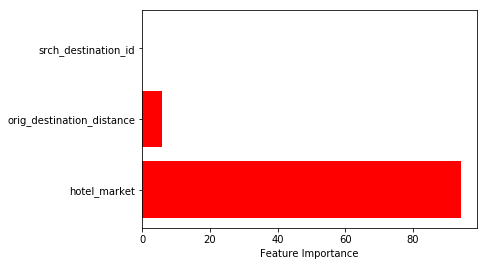

In [29]:
importance = cat_all.feature_importances_
indices=np.argsort(importance)[::-1][:10]
importance[indices]

plt.barh(range(3), importance[indices],color='r')
plt.yticks(range(3),train1.columns[indices])
plt.xlabel('Feature Importance')
plt.show()

In [31]:
cat_all

In [ ]:
y_pred=rf_all.predict_proba(test) # predict on test dataset

In [ ]:
y_pred

In [103]:
#取機率前五高
a=y_pred.argsort(axis=1)[:,-5:]

In [ ]:
a

In [ ]:
test=pd.read_csv('C://Users//user//Big_Data_Class//final_project//test.csv')

In [ ]:
write_p = [" ".join([str(l) for l in p]) for p in a]
write_frame = ["{0},{1}".format(test["id"][i], write_p[i]) for i in range(len(a))]
write_frame = ["id,hotel_cluster"] + write_frame

In [ ]:
import os
import time
with open('submission_'+time.strftime("%Y-%m-%d %H%M%S", time.localtime())+'.csv', "w+") as f:
    f.write("\n".join(write_frame))